# revolution 1

- <https://abce.readthedocs.io/en/master/jupyter_tutorial.html>

- <http://misunderheard.org/monetary_economics>

- <https://github.com/spatchcock/monetary_economics_python/blob/master/notebooks/1_spending_income_and_the_circular_flow_of_money.ipynb>

- <http://www.decisionsciencenews.com/2017/06/19/counterintuitive-problem-everyone-room-keeps-giving-dollars-random-others-youll-never-guess-happens-next>

In [1]:
import abcEconomics
import datetime
from matplotlib import gridspec
import matplotlib.pylab as plt
from matplotlib.ticker import NullFormatter, NullLocator, MultipleLocator
import pandas as pd
import numpy as np
import pandas as pd
import random
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns
sns.set(style = 'ticks')
sns.set_palette('husl')
import uuid

LOCAL
[I 12:58:52 flexx.app] Asset store collected 2 new modules.


In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [17, 14]

People have wealth and income differences. Create a population of 100 people with capitalist incomes based on ONS incomes.

- <https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/bulletins/householddisposableincomeandinequality/yearending2018>
- <https://www.ons.gov.uk/peoplepopulationandcommunity/personalandhouseholdfinances/incomeandwealth/datasets/householddisposableincomeandinequality>

The median household disposable income in the UK was 28,000 GBP in 2018.

From `hdiireferencetables201718.xlsx` table 17, the average equivalised disposable income per household in ten bins is as follows:

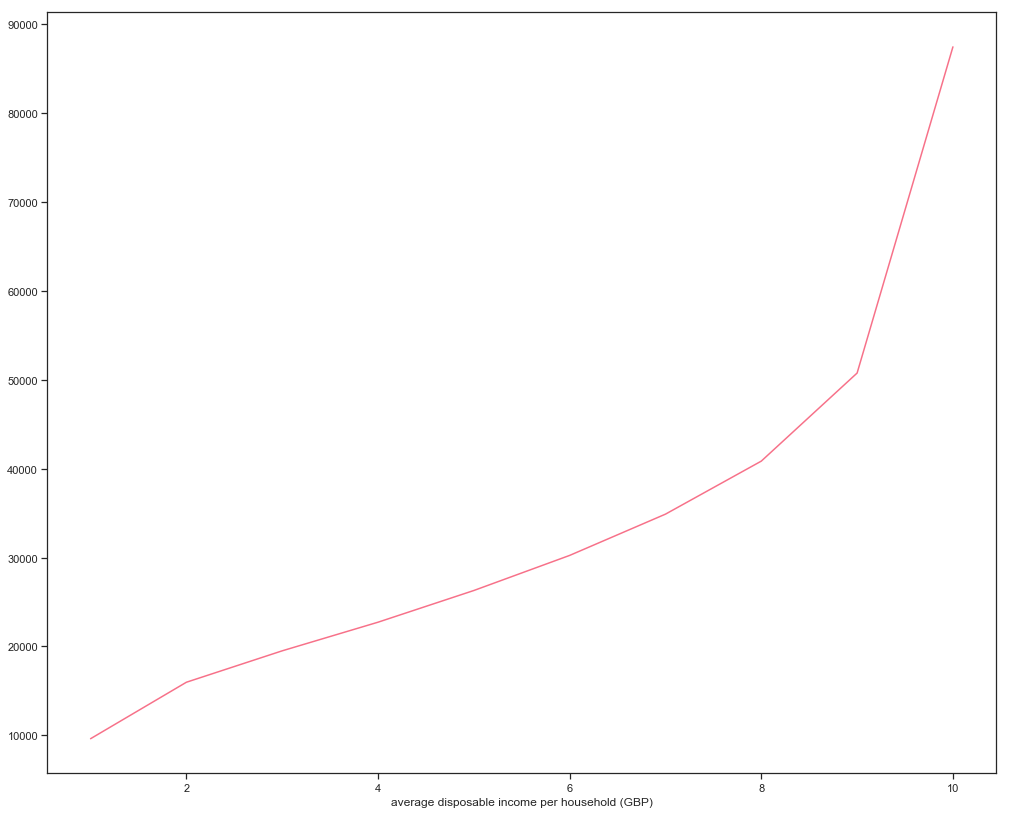

In [3]:
df1 = pd.DataFrame(
         [
             [1,   9621],
             [2,  15975],
             [3,  19511],
             [4,  22732],
             [5,  26299],
             [6,  30249],
             [7,  34893],
             [8,  40860],
             [9,  50772],
             [10, 87480],
         ],
         columns = [
             "decile",
             "income"
         ]
    )

def f(x):
    # approximate fit
    # (The Lorenz curve is an approximation for distribution of income.)
    return 217.3900694*x**3-2527.787566*x**2+11157.81657*x+4455.816911

df1['income_fit'] = df1.apply(lambda row: f(row['decile']), axis=1)

plt.plot(df1["decile"], df1["income"])
plt.xlabel('decile')
plt.xlabel('average disposable income per household (GBP)');

In [4]:
population_size = 100
days = 365

In [5]:
df_sample = pd.DataFrame(columns=['position', 'income_per_day'])
df_sample['position'] = np.random.uniform(1, 10, size=population_size)
df_sample['income']   = f(df_sample['position']) / days
#df_sample.hist();

In [6]:
df_sample['income'].median()

69.79600880930118

In [7]:
df_sample['income_evolving'] = df_sample['income']
median_incomes = []
for day in range(1, days):
    median_income = df_sample['income_evolving'].median()
    median_incomes.append(median_income)
    df_sample['income_evolving'] += median_income

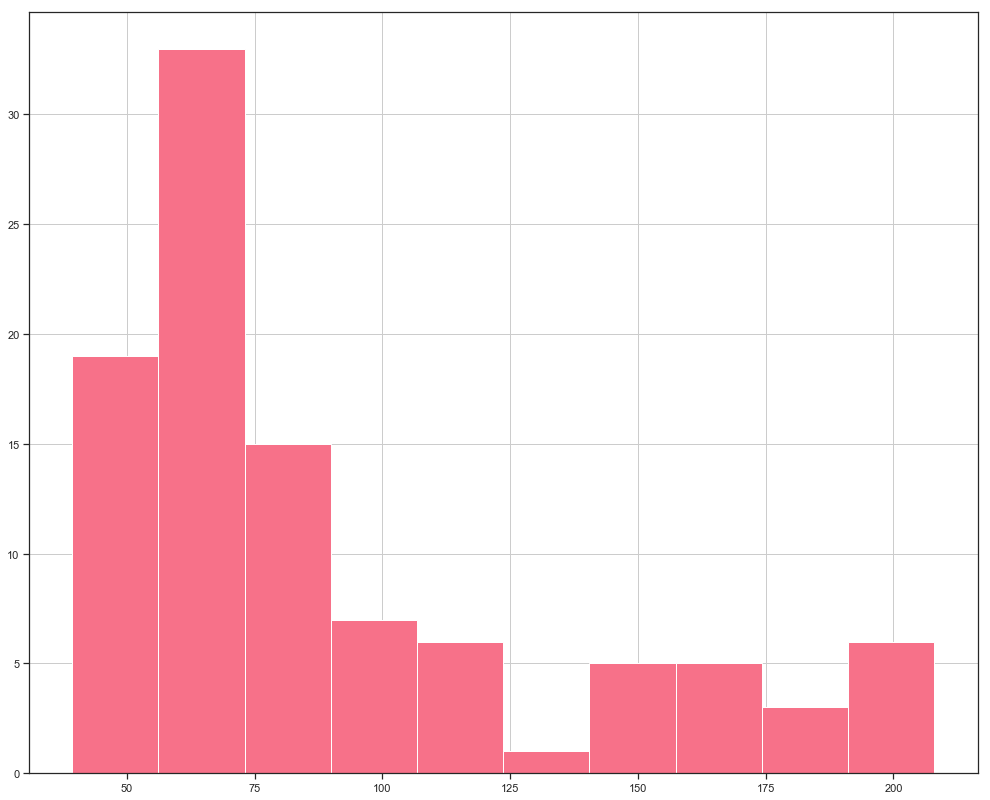

In [8]:
df_sample['income'].hist();

# Gini coefficient

The Gini coefficient is a measure of statistical dispersion which can be used as a single number that describes the income or wealth distribution of a population and is a commonly-used measurement of inequality. A Gini coefficient of close to zero corresponds to maximal equality, for example where a population has the same income for all members, and a Gini coefficient of close to one corresponds to maximal inequality, for example where one member of a population has all the income and all other members have none. A Gini coefficient of greater than one might correspond to some members of a population having negative income, while a Gini coefficient of less than zero would correspond to a negative mean.

Specifically, the Gini coefficient can be defined as half of the relative mean absolute difference. The mean absolute difference is the mean absolute difference of all pairs of items of the population, and the relative mean absolute difference is the mean absolute difference by the mean in order to normalise for scale. 

In [9]:
def gini(values):
    values_sorted = sorted(values)
    height, area  = 0, 0
    for value in values_sorted:
        height += value
        area   += height - value / 2
    fair_area = height * len(values) / 2
    return (fair_area - area) / fair_area

In [10]:
gini(df_sample['income'])

0.2646888336517649

Gini coefficient: 0.0


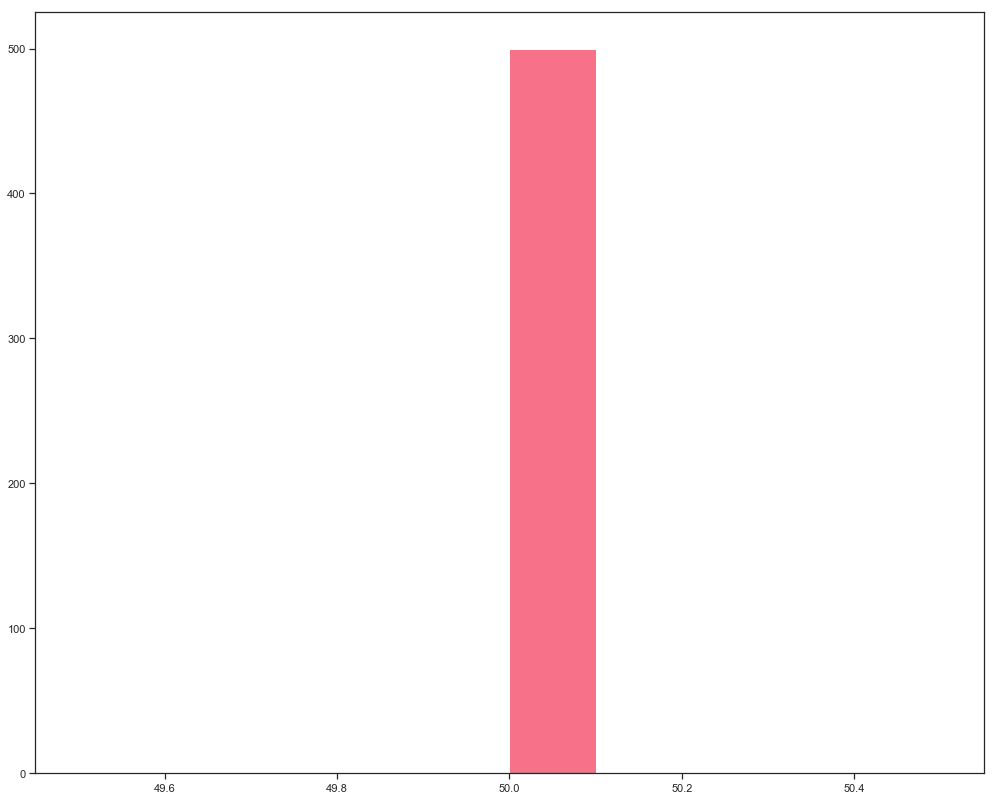

In [11]:
# Boltzmann distribution
# https://arxiv.org/pdf/1405.6114.pdf

starting_balance = 50
population       = 500
balances         = [starting_balance for i in range(population)]

plt.hist(sorted(balances), bins=10);
print("Gini coefficient:", gini(balances))

Gini coefficient: 0.78995376


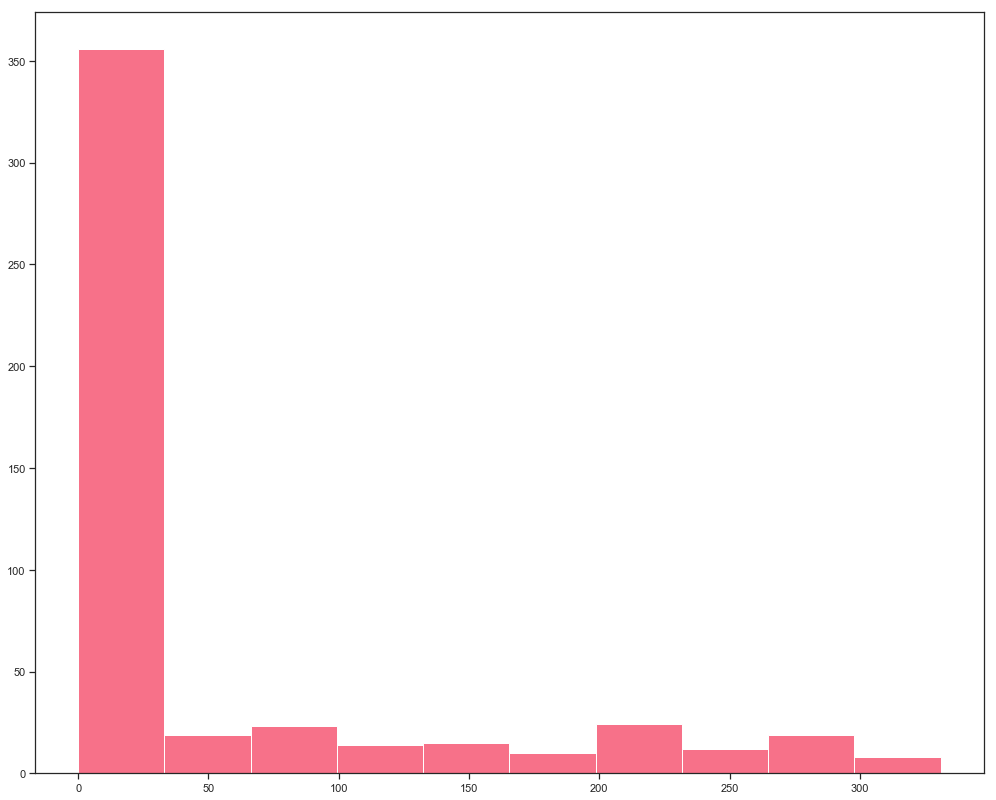

In [12]:
# per unit time each member of the population that has money gives 1 money unit to a
# randomly-selected other member
rounds = 500
for r in range(rounds):
    for individual in range(population):
        if balances[individual] > 0:
            recipient = random.randint(0, population - 2)
            if recipient >= individual:
                recipient            += 1
                balances[individual] -= 1
                balances[recipient]  += 1

print("Gini coefficient:", gini(balances))
plt.hist(sorted(balances), bins=10);

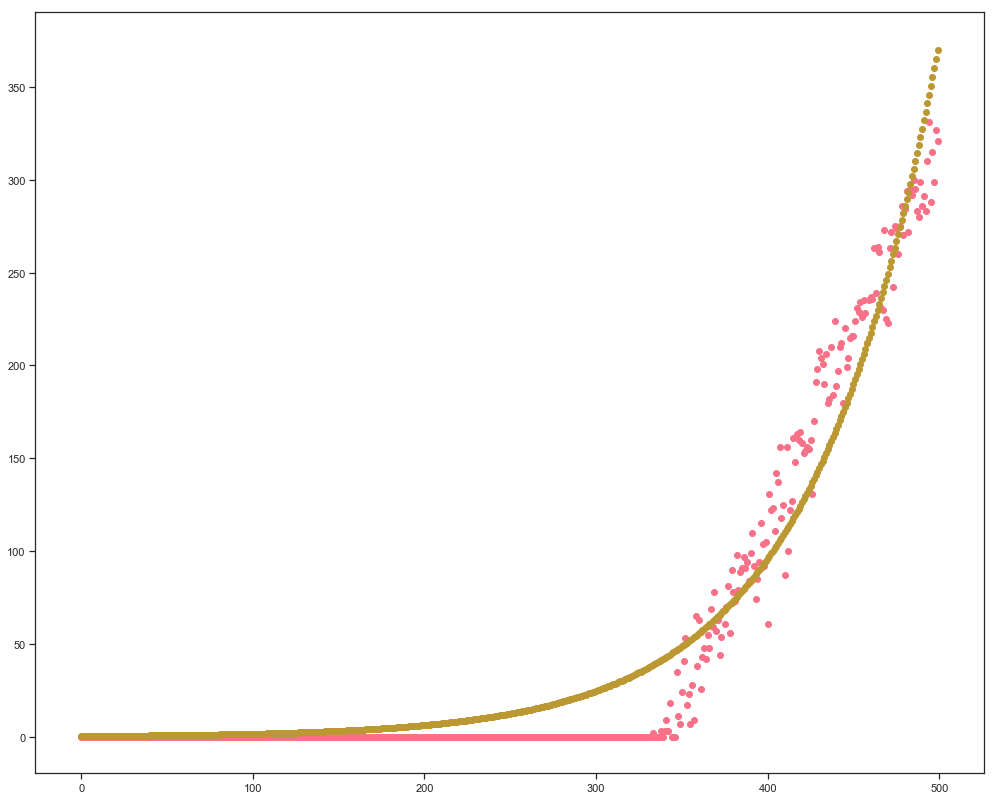

In [13]:
x = list(range(0, len(balances)))
y = balances

def f(x, a, b):
    return a*b**x

params = curve_fit(f, x, y)
a, b = params[0]
_y = f(x, a, b)

plt.scatter(x, y);
plt.scatter(x, _y);

In [14]:
simulation = abcEconomics.Simulation(name='simulation', processes=1)

class Agent(abcEconomics.Agent):
    def init(self, world_size, family_name):
        self.family_name = family_name
        self.world_size  = world_size
        
    def say(self):
        print(f'Hello! I am {self.family_name}, with ID {self.id} and group {self.group}.')

agents = simulation.build_agents(
    Agent,
    'agent',
    world_size       = 30,
    agent_parameters = [
                           {'family_name': 'Gavin'}, 
                           {'family_name': 'Liam' }, 
                           {'family_name': 'Steve'}, 
                           {'family_name': 'Will' }
                       ]
)

for r in range(5):
    print(f'\nround {r}')
    simulation.advance_round(r)
    agents.say()
simulation.finalize()


round 0
Hello! I am Gavin, with ID 0 and group agent.
Hello! I am Steve, with ID 2 and group agent.
Hello! I am Liam, with ID 1 and group agent.
Hello! I am Will, with ID 3 and group agent.

round 1
Hello! I am Gavin, with ID 0 and group agent.
Hello! I am Steve, with ID 2 and group agent.
Hello! I am Liam, with ID 1 and group agent.
Hello! I am Will, with ID 3 and group agent.

round 2
Hello! I am Gavin, with ID 0 and group agent.
Hello! I am Steve, with ID 2 and group agent.
Hello! I am Liam, with ID 1 and group agent.
Hello! I am Will, with ID 3 and group agent.

round 3
Hello! I am Gavin, with ID 0 and group agent.
Hello! I am Steve, with ID 2 and group agent.
Hello! I am Liam, with ID 1 and group agent.
Hello! I am Will, with ID 3 and group agent.

round 4
Hello! I am Gavin, with ID 0 and group agent.
Hello! I am Steve, with ID 2 and group agent.
Hello! I am Liam, with ID 1 and group agent.
Hello! I am Will, with ID 3 and group agent.

time only simulation   0.00
time with data  